In [3]:
import sobol_seq
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap

import pandas as pd

In [4]:
import matplotlib.style as style
# style.use('ggplot')

In [5]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

**Set base file and destination folder for ensemble**

In [66]:
fname_xml_base = "BSL_profile.xml"
ens_dir = "Perm_ens/Perm_ens"

In [67]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

**import starting values for parameters**

In [68]:
# starting value for alpha,n,res_sat and permeability
pred_perm = [1.26e-13]

**Create sobol sequence**

In [69]:
dat = sobol_seq.i4_sobol_generate(dim_num= 1, n = 100)

**generate random values for the parameters**

In [70]:
# set lower bound for alpha,n,res_sat and permeability
para = 1e-19
ens_array = para**(2*dat)

In [71]:
# set order of magnitude 
n_order3 = 7
ens_array = para*10**(n_order3*dat)

In [72]:
rownames = ['_' + str(i+1) for i in np.arange(100)]

In [73]:
ens_df = pd.DataFrame(data = ens_array, columns=['permeability [m^2]'], index=rownames)
# ens_df.to_csv(fname_ensemble_csv)

In [74]:
ens_df.to_csv('data/perm_ensemble_parameters.csv', index=False)

**plot all ensemble**

In [75]:
# ens_array = ens_array[:500, :]

Text(0, 0.5, 'Permeability ($m^2$)')

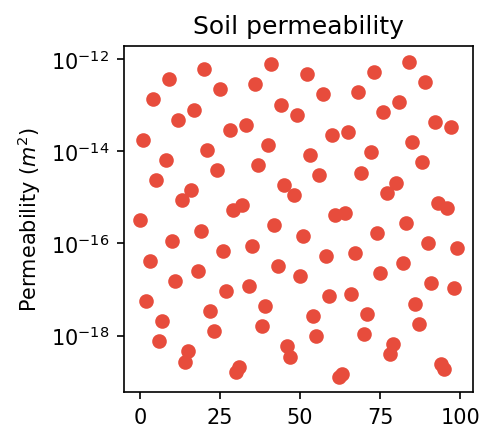

In [76]:
# cmap = ListedColormap(sn.color_palette(flatui))

fig, ax=plt.subplots(1,1, figsize=(3,3))

ax.set(yscale="log")
ax.scatter(np.arange(100), ens_array, color = flatui[3])
#ax.set_ylim([1.5e-14, 1.5e-11])
ax.set_title('Soil permeability')
ax.set_ylabel('Permeability ($m^2$)')



In [77]:
# fig.savefig("./ensemble.png",dpi=300)
# plt.close(fig)

# Write input files

In [78]:
from itertools import islice

In [79]:
permeability_block = '''
      <ParameterList name="permeability">
        <Parameter name="evaluator type" type="string" value="independent variable" />
        <Parameter name="constant in time" type="bool" value="true" />
        <ParameterList name="function" type="ParameterList">
          <ParameterList name="GLHYMPS_100" type="ParameterList">
            <Parameter name="region" type="string" value="GLHYMPS_100" />
            <Parameter name="component" type="string" value="cell" />
            <ParameterList name="function" type="ParameterList">
              <ParameterList name="function-constant" type="ParameterList">
                <Parameter name="value" type="double" value="1.58e-12" />
              </ParameterList>
            </ParameterList>
          </ParameterList>
          <ParameterList name="NRCS_1000" type="ParameterList">
            <Parameter name="region" type="string" value="NRCS_1000" />
            <Parameter name="component" type="string" value="cell" />
            <ParameterList name="function" type="ParameterList">
              <ParameterList name="function-constant" type="ParameterList">
                <Parameter name="value" type="double" value="{}" />
              </ParameterList>
            </ParameterList>
          </ParameterList>
          <ParameterList name="NRCS_1001" type="ParameterList">
            <Parameter name="region" type="string" value="NRCS_1001" />
            <Parameter name="component" type="string" value="cell" />
            <ParameterList name="function" type="ParameterList">
              <ParameterList name="function-constant" type="ParameterList">
                <Parameter name="value" type="double" value="4.95e-14" />
              </ParameterList>
            </ParameterList>
          </ParameterList>
        </ParameterList>
      </ParameterList>
'''

In [80]:
# ixml = 'ens1'
ens_names = ['_' + str(i+1) for i in np.arange(100)]
for iens in ens_names[:]:

    # iens = 0
    l1 = ens_df.loc[iens, 'permeability [m^2]']

    permeability_block_file = permeability_block.format(l1)

    nline = permeability_block_file.count('\n') # a total of nline-1 lines since there is a line break '\n' at the begining

    with open(fname_xml_base, 'r') as file:
        # read a list of lines into data
        xml_base = file.readlines()
    # find the starting index for permeability block
    ind = xml_base.index('      <ParameterList name="permeability">\n')

    with open(fname_xml_base, 'r') as fin:
        with open(ens_dir + iens + '.xml', 'w') as fout:

            lines = fin.readlines()

            it = iter(enumerate(lines))
            for i, line in it:
                if i == ind:
                    fout.write(permeability_block.format(l1))            
                    next(islice(it, nline-2 , nline-2), None) # skip the next (nline-2) lines
                else:
                    fout.write(line)

                         